In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

# Data Loading

In [3]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
print('Duplicated rows:', df.duplicated().sum())

Duplicated rows: 24


In [8]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
categorical_column = df.select_dtypes('object').columns
numerical_column = df.select_dtypes('number').columns

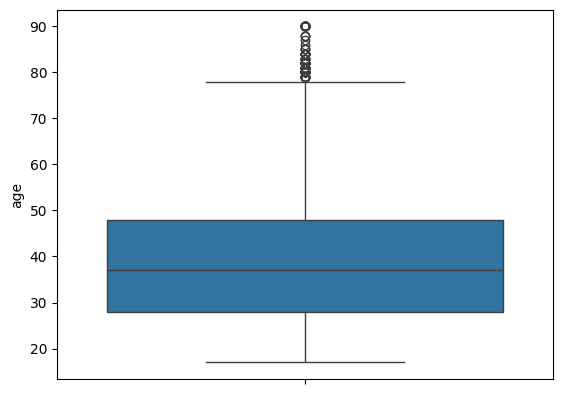

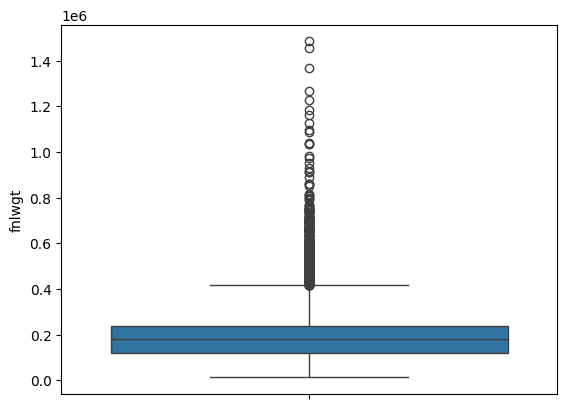

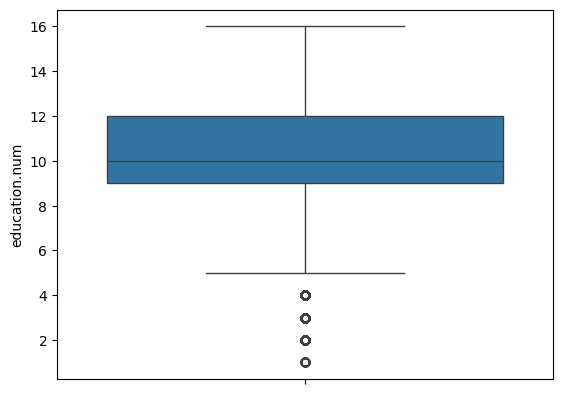

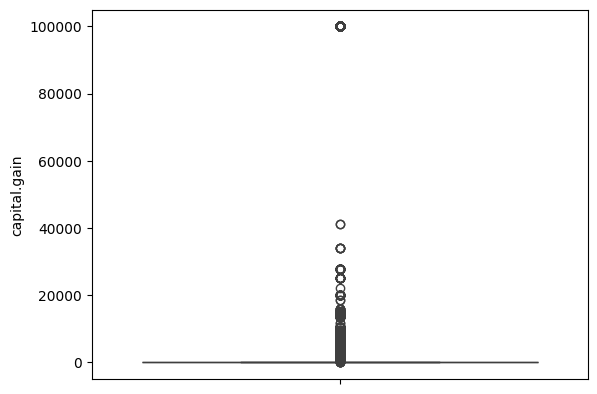

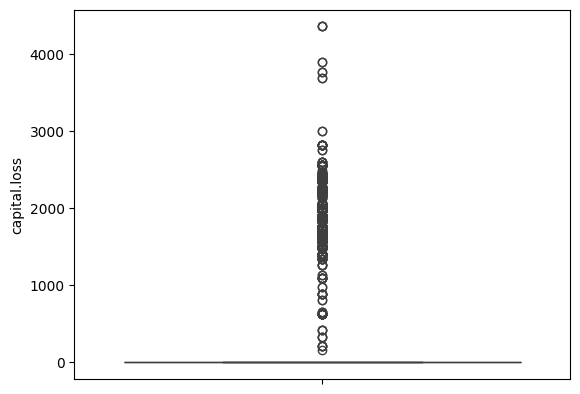

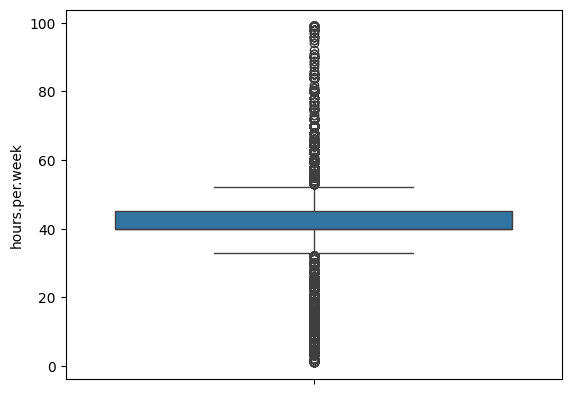

In [10]:
for column in numerical_column:
    sns.boxplot(df[column])
    plt.show()

In [11]:
df[df['relationship']=='Unmarried']['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-spouse-absent'], dtype=object)

In [12]:
df[df['relationship']=='Other-relative']['marital.status'].unique()

array(['Never-married', 'Separated', 'Married-civ-spouse', 'Divorced',
       'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [13]:

for column in categorical_column:
    print('\nColumn:',column)
    print('Values:',df[column].unique())


Column: workclass
Values: ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

Column: education
Values: ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

Column: marital.status
Values: ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

Column: occupation
Values: ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Column: relationship
Values: ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

Column: race
Values: ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

Column: sex
Values: ['Female' 'Male']

Col

In [14]:
for i in range (1,17):
    edu = df[df['education.num']==i]['education'].unique()
    print(f"Education.num: {i} -> {edu}")

Education.num: 1 -> ['Preschool']
Education.num: 2 -> ['1st-4th']
Education.num: 3 -> ['5th-6th']
Education.num: 4 -> ['7th-8th']
Education.num: 5 -> ['9th']
Education.num: 6 -> ['10th']
Education.num: 7 -> ['11th']
Education.num: 8 -> ['12th']
Education.num: 9 -> ['HS-grad']
Education.num: 10 -> ['Some-college']
Education.num: 11 -> ['Assoc-voc']
Education.num: 12 -> ['Assoc-acdm']
Education.num: 13 -> ['Bachelors']
Education.num: 14 -> ['Masters']
Education.num: 15 -> ['Prof-school']
Education.num: 16 -> ['Doctorate']


In [15]:
marital_status = df['marital.status'].unique()

for value in marital_status:
    relationship = df[df['marital.status']==value]['relationship'].unique()
    print(f"Marital status: {value} -> {relationship}")

Marital status: Widowed -> ['Not-in-family' 'Unmarried' 'Other-relative' 'Own-child']
Marital status: Divorced -> ['Unmarried' 'Not-in-family' 'Own-child' 'Other-relative']
Marital status: Separated -> ['Own-child' 'Unmarried' 'Not-in-family' 'Other-relative']
Marital status: Never-married -> ['Other-relative' 'Unmarried' 'Not-in-family' 'Own-child']
Marital status: Married-civ-spouse -> ['Husband' 'Not-in-family' 'Wife' 'Other-relative' 'Own-child']
Marital status: Married-spouse-absent -> ['Unmarried' 'Not-in-family' 'Own-child' 'Other-relative']
Marital status: Married-AF-spouse -> ['Husband' 'Wife' 'Own-child' 'Other-relative']


Columns information:
- age: int -> `17 - 90`
- workclass: object -> `Private, State-gov, Federal-gov, Self-emp-not-inc, Self-emp-inc, Local-gov, Without-pay, Never-worked`
- fnlwgt: int -> `12,285 - 1,484,705`
- education: object -> `HS-grad, Some-college, 7th-8th, 10th, Doctorate, Prof-school, Bachelors, Masters, 11th, Assoc-acdm, Assoc-voc, 1st-4th, 5th-6th, 12th, 9th, Preschool`
- education.num: int -> `1 - 16`
- marital.status: object -> `Widowed, Divorced, Separated, Never-married, Married-civ-spouse, Married-spouse-absent, Married-AF-spouse`
- occupation: `Exec-managerial, Machine-op-inspct, Prof-specialty, Other-service, Adm-clerical, Craft-repair, Transport-moving, Handlers-cleaners, Sales, Farming-fishing, Tech-support, Protective-serv, Armed-Forces, Priv-house-serv`
- relationship: object -> `Not-in-family, Unmarried, Own-child, Other-relative, Husband, Wife`
- race: object -> `White, Black, Asian-Pac-Islander, Other, Amer-Indian-Eskimo`
- sex: object -> `Female, Male`
- capital.gain: int -> `0 - 9999`
- capital.loss: int -> `0 - 4356`
- hours.per.week: int -> `1 - 99`
- native.country: object -> `United-States, Mexico, Greece, Vietnam, China, Taiwan, India, Philippines, Trinadad&Tobago, Canada, South, Holand-Netherlands, Puerto-Rico, Poland, Iran, England, Germany, Italy, Japan, Hong, Honduras, Cuba, Ireland, Cambodia, Peru, Nicaragua, Dominican-Republic, Haiti, El-Salvador, Hungary, Columbia, Guatemala, Jamaica, Ecuador, France, Yugoslavia, Scotland, Portugal, Laos, Thailand, Outlying-US(Guam-USVI-etc)`
- income: object -> `<=50K, >50K`

Feature Analysis for Cleaning
- Null columns are written as '?'
- There are 24 duplicated columns
- 'relationship' column is redundant with 'marital.status'

In [16]:
df_cleaned = df.replace('?', None)

df_cleaned.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
df_cleaned.dropna(inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
df_cleaned.drop_duplicates(inplace=True)
print('Duplicated rows:', df_cleaned.duplicated().sum())
df_cleaned.info()

Duplicated rows: 0
<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   education.num   30139 non-null  int64 
 5   marital.status  30139 non-null  object
 6   occupation      30139 non-null  object
 7   relationship    30139 non-null  object
 8   race            30139 non-null  object
 9   sex             30139 non-null  object
 10  capital.gain    30139 non-null  int64 
 11  capital.loss    30139 non-null  int64 
 12  hours.per.week  30139 non-null  int64 
 13  native.country  30139 non-null  object
 14  income          30139 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
df_cleaned.drop('relationship',axis=1,inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 1 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   education.num   30139 non-null  int64 
 5   marital.status  30139 non-null  object
 6   occupation      30139 non-null  object
 7   race            30139 non-null  object
 8   sex             30139 non-null  object
 9   capital.gain    30139 non-null  int64 
 10  capital.loss    30139 non-null  int64 
 11  hours.per.week  30139 non-null  int64 
 12  native.country  30139 non-null  object
 13  income          30139 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.4+ MB


In [21]:
# Q1 = df_cleaned[numerical_column].quantile(0.25)
# Q3 = df_cleaned[numerical_column].quantile(0.75)
# IQR = Q3 - Q1

# median = df_cleaned[numerical_column].median()
# df_cleaned[numerical_column] = np.where((df_cleaned[numerical_column] < Q1 - 1.5 * IQR) | (df_cleaned[numerical_column] > Q3 + 1.5 * IQR), median, df_cleaned[numerical_column])

In [22]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 1 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   education.num   30139 non-null  int64 
 5   marital.status  30139 non-null  object
 6   occupation      30139 non-null  object
 7   race            30139 non-null  object
 8   sex             30139 non-null  object
 9   capital.gain    30139 non-null  int64 
 10  capital.loss    30139 non-null  int64 
 11  hours.per.week  30139 non-null  int64 
 12  native.country  30139 non-null  object
 13  income          30139 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.4+ MB


In [23]:
df_cleaned.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.897950e+05,10.122532,1092.841202,88.439928,40.934703
std,13.131426,1.056586e+05,2.548738,7409.110596,404.445239,11.978753
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176275e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376045e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [24]:
df_cleaned.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,White,Female,0,3683,40,United-States,<=50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,White,Male,0,2824,45,United-States,>50K
12,52,Private,129177,Bachelors,13,Widowed,Other-service,White,Female,0,2824,20,United-States,>50K


# Exploratory Data Analysis

In [25]:
categorical_column = df_cleaned.select_dtypes('object').columns
numerical_column = df_cleaned.select_dtypes('number').columns

categorical_color = sns.color_palette("Set2")
numerical_color = sns.color_palette("viridis", as_cmap=True)

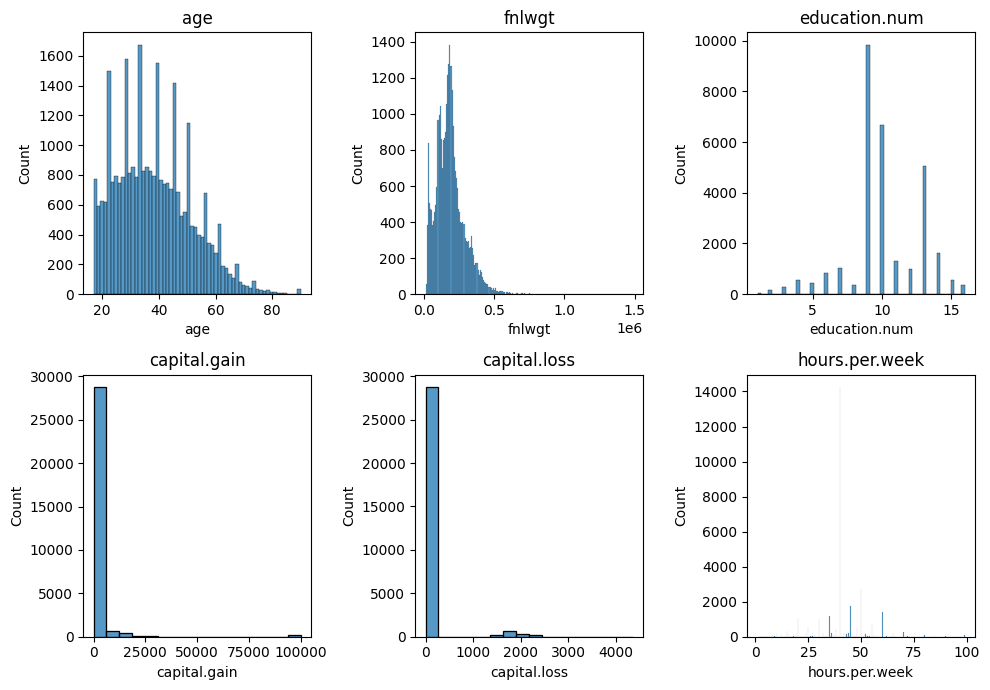

In [26]:
plt.figure(figsize=(10,7))

for i, column in enumerate(numerical_column,1):
    plt.subplot(2,3,i)
    sns.histplot(data=df_cleaned[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

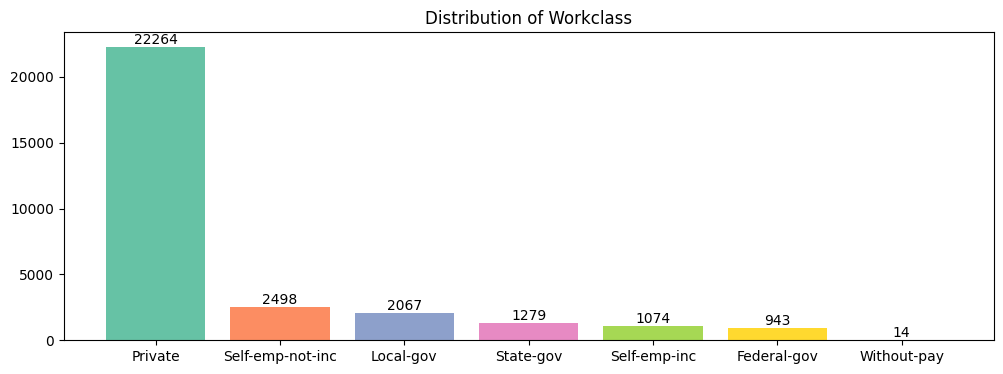

In [27]:
workclass_count = df_cleaned['workclass'].value_counts()

plt.figure(figsize=(12,4))
plt.bar(workclass_count.index, workclass_count, color=categorical_color)
for index,value in enumerate(workclass_count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title("Distribution of Workclass")
plt.show()

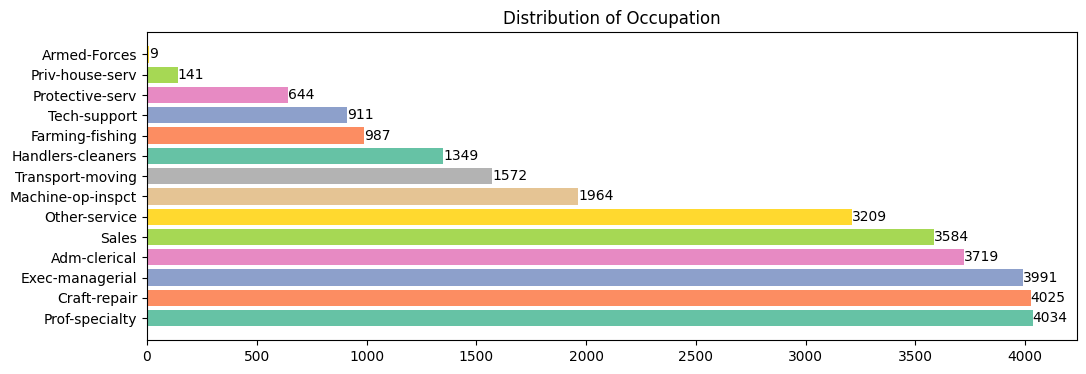

In [28]:
occupation_count = df_cleaned['occupation'].value_counts()

plt.figure(figsize=(12,4))
plt.barh(occupation_count.index, occupation_count, color=categorical_color)
for index,value in enumerate(occupation_count):
    plt.text(value, index, str(value), ha='left', va='center')

plt.title("Distribution of Occupation")
plt.show()

In [29]:
df_cleaned['education'].unique()
edu_labels = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']

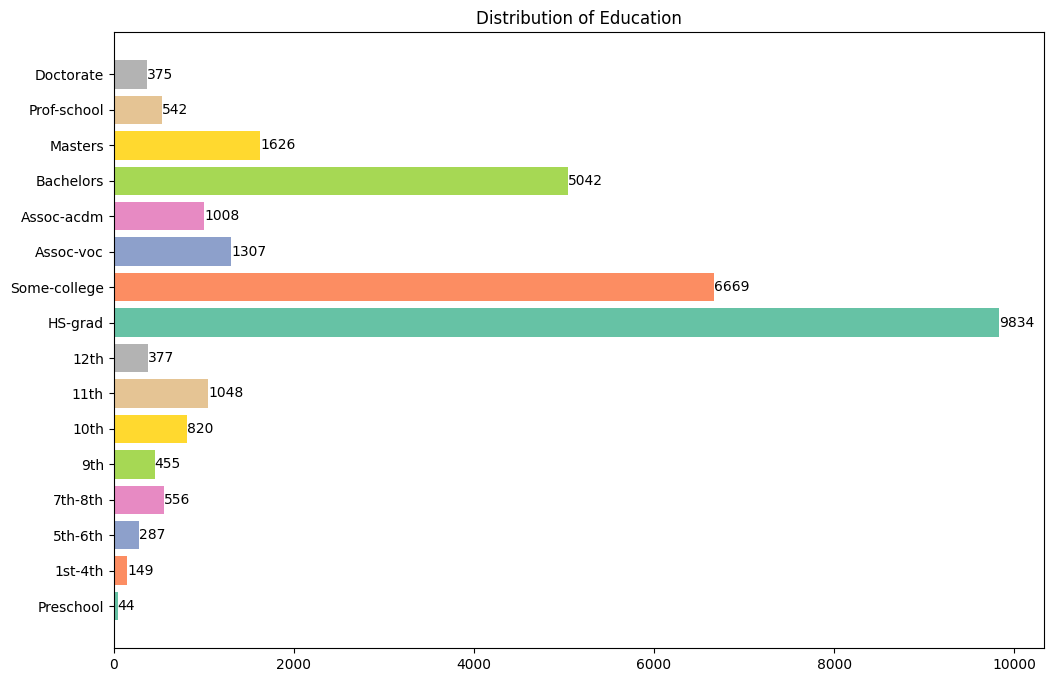

In [30]:
df_cleaned['education'] = pd.Categorical(df_cleaned['education'], categories=edu_labels, ordered=True)

edu_count = df_cleaned['education'].value_counts(sort=False)

plt.figure(figsize=(12,8))
plt.barh(edu_count.index, edu_count, color=categorical_color)
for index,value in enumerate(edu_count):
    plt.text(value, index, str(value), ha='left', va='center')

plt.title("Distribution of Education")
plt.show()

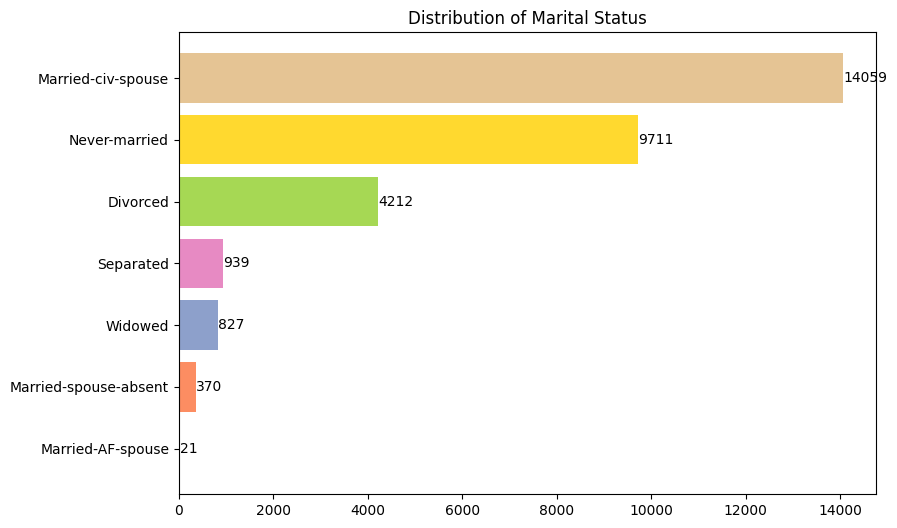

In [31]:
marital_count = df_cleaned['marital.status'].value_counts(ascending=True)

plt.figure(figsize=(9,6))
plt.barh(marital_count.index, marital_count, color=categorical_color)
for index,value in enumerate(marital_count):
    plt.text(value, index, str(value), ha='left', va='center')

plt.title("Distribution of Marital Status")
plt.show()

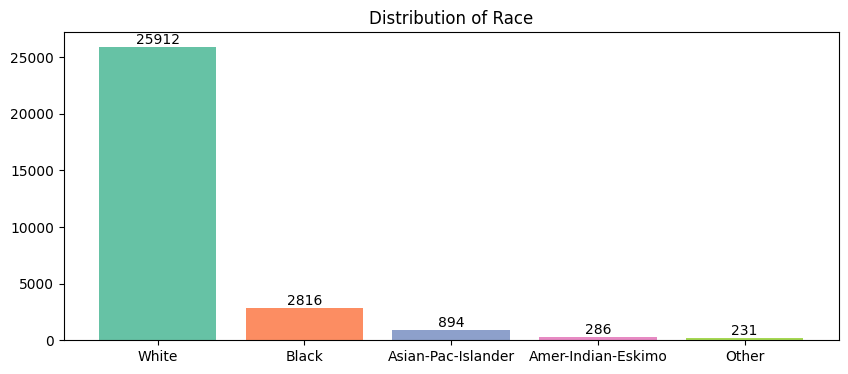

In [32]:
race_count = df_cleaned['race'].value_counts()

plt.figure(figsize=(10,4))
plt.bar(race_count.index, race_count, color=categorical_color)
for index,value in enumerate(race_count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title("Distribution of Race")
plt.show()

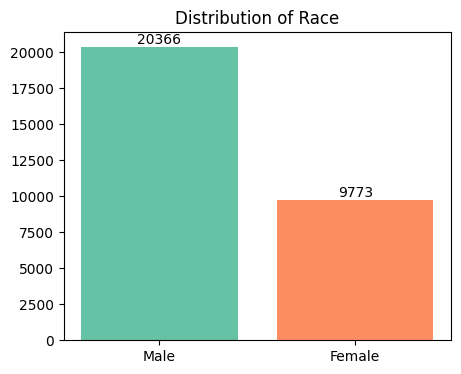

In [33]:
sex_count = df_cleaned['sex'].value_counts()

plt.figure(figsize=(5,4))
plt.bar(sex_count.index, sex_count, color=categorical_color)
for index,value in enumerate(sex_count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title("Distribution of Race")
plt.show()

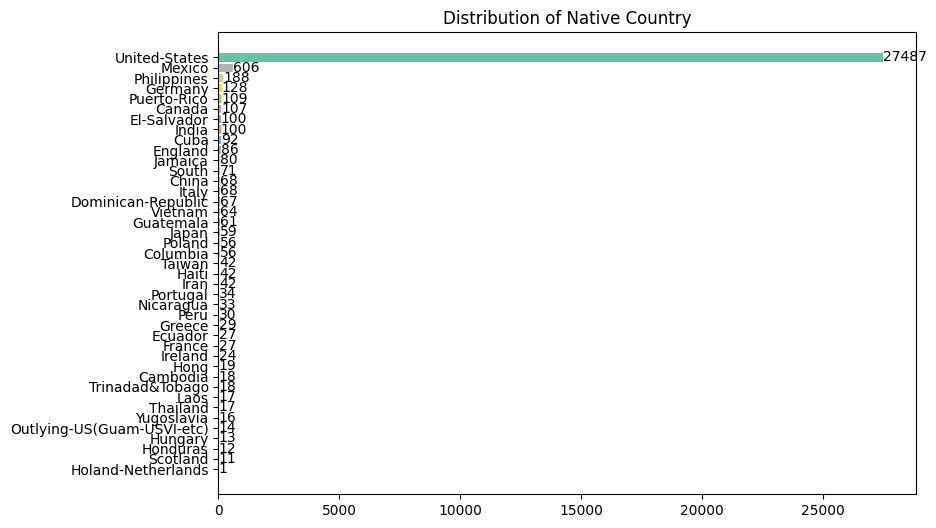

In [34]:
country_count = df_cleaned['native.country'].value_counts(ascending=True)

plt.figure(figsize=(9,6))
plt.barh(country_count.index, country_count, color=categorical_color)
for index,value in enumerate(country_count):
    plt.text(value, index, str(value), ha='left', va='center')

plt.title("Distribution of Native Country")
plt.show()

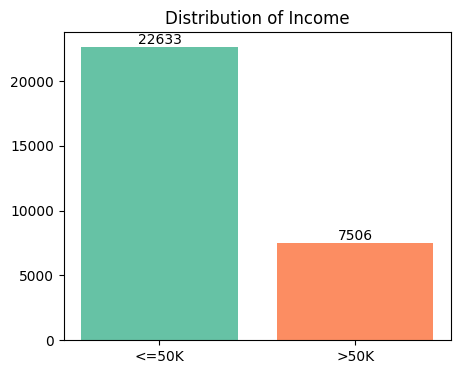

In [35]:
income_count = df_cleaned['income'].value_counts()

plt.figure(figsize=(5,4))
plt.bar(income_count.index, income_count, color=categorical_color)
for index,value in enumerate(income_count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title("Distribution of Income")
plt.show()

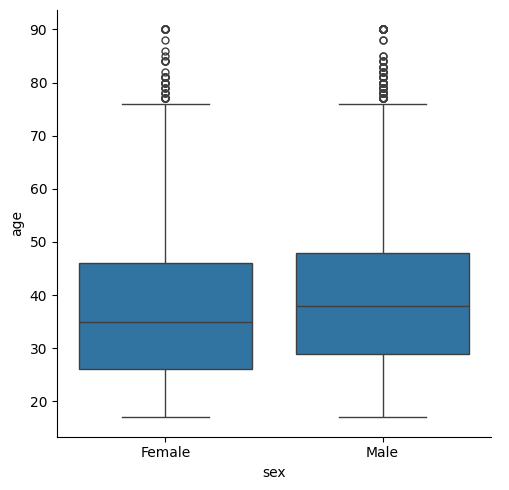

In [36]:
sns.catplot(data=df_cleaned, x='sex', y='age', kind='box')
plt.tight_layout()
plt.show()

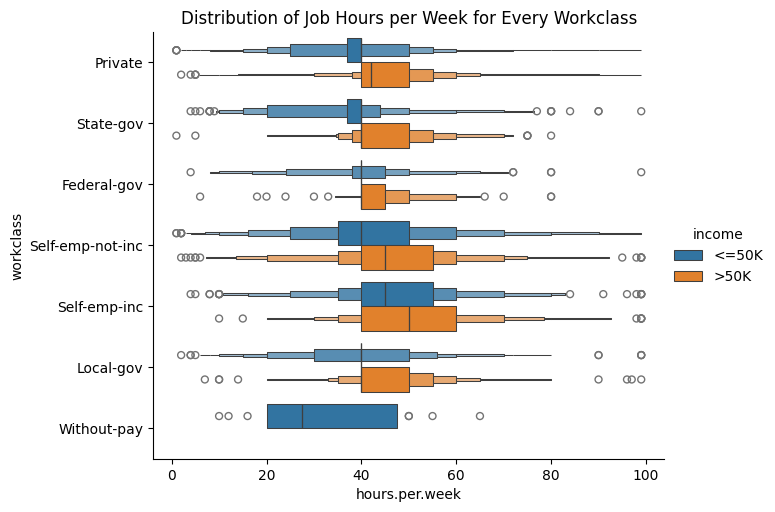

In [37]:
sns.catplot(data=df_cleaned, x='hours.per.week', y='workclass', kind='boxen', hue='income', height=5, aspect=1.4)
plt.title('Distribution of Job Hours per Week for Every Workclass')
plt.show()

In [38]:
pd.crosstab(df_cleaned["race"], df_cleaned["income"])

income,<=50K,>50K
race,,
Amer-Indian-Eskimo,252,34
Asian-Pac-Islander,646,248
Black,2450,366
Other,210,21
White,19075,6837


In [39]:
pd.crosstab(df_cleaned["workclass"], df_cleaned["income"])

income,<=50K,>50K
workclass,,
Federal-gov,578,365
Local-gov,1458,609
Private,17390,4874
Self-emp-inc,474,600
Self-emp-not-inc,1784,714
State-gov,935,344
Without-pay,14,0


In [40]:
pd.crosstab(df_cleaned["occupation"], df_cleaned["income"])

income,<=50K,>50K
occupation,,
Adm-clerical,3221,498
Armed-Forces,8,1
Craft-repair,3117,908
Exec-managerial,2054,1937
Farming-fishing,872,115
Handlers-cleaners,1266,83
Machine-op-inspct,1720,244
Other-service,3077,132
Priv-house-serv,140,1


In [41]:
pd.crosstab(df_cleaned["education"], df_cleaned["income"])

income,<=50K,>50K
education,,
Preschool,44,0
1st-4th,143,6
5th-6th,275,12
7th-8th,521,35
9th,430,25
10th,761,59
11th,989,59
12th,348,29
HS-grad,8218,1616


# Data Preprocessing and Splitting

In [42]:
df_cleaned['income'] = df_cleaned['income'].replace(['<=50K','>50K'], [0,1])

df_cleaned.head()

C:\Users\frend\AppData\Local\Temp\ipykernel_21936\2863192233.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['income'] = df_cleaned['income'].replace(['<=50K','>50K'], [0,1])


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,White,Male,0,3770,40,United-States,0


In [43]:
df_cleaned

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,White,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,White,Female,0,0,40,United-States,0


In [44]:
X = df_cleaned.drop("income", axis=1)
y = df_cleaned["income"]

X_encoded = pd.get_dummies(X)

mi = mutual_info_classif(X_encoded, y, discrete_features="auto")
mi_series = pd.Series(mi, index=X_encoded.columns).sort_values(ascending=False)
print(mi_series.head(10))

marital.status_Married-civ-spouse    0.109566
capital.gain                         0.079512
education.num                        0.067838
age                                  0.065567
marital.status_Never-married         0.063526
hours.per.week                       0.042588
capital.loss                         0.037560
fnlwgt                               0.029996
sex_Female                           0.028433
sex_Male                             0.025709
dtype: float64


Kolom-kolom yang didrop:
- fnlwgt: tidak relevan pada hasil model
- sex: tidak berpengaruh pada penghasilan (income)
- native.country: tidak berpengaruh pada penghasilan (income)
- education: sudah ada fitur 'education.num', jadi tidak perlu lagi ada kolom ini
- race: tidak berpengaruh pada penghasilan (income)
- workclass: tidak relevan dengan hasil model

In [62]:
df_drop = df_cleaned.drop(['fnlwgt', 'sex', 'native.country', 'education', 'race', 'workclass'], axis=1)

In [63]:
X = df_drop.drop('income', axis=1)
y = df_drop['income']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.35, random_state=42)

print('Train size:',X_train.shape)
print('Test size:',X_test.shape)

Train size: (19590, 26)
Test size: (10549, 26)


In [64]:
X_train.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
6490,40,9,0,0,40,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
3576,29,9,3325,0,40,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
103,50,15,0,2415,30,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
15332,28,9,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
28122,38,10,0,0,25,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [65]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

X_train_scaled

,age,education.num,capital.gain,capital.loss,hours.per.week,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,0.122244,-0.437065,-0.148930,-0.219891,-0.078001,-0.401024,-0.02859,1.069374,-0.112072,-0.690118,...,-0.185106,4.622014,-0.259280,-0.346232,-0.067556,-0.387715,-0.146934,-0.369917,-0.175446,-0.23714
1,-0.718075,-0.437065,0.309686,-0.219891,-0.078001,-0.401024,-0.02859,-0.935127,-0.112072,1.449028,...,-0.185106,-0.216356,3.856838,-0.346232,-0.067556,-0.387715,-0.146934,-0.369917,-0.175446,-0.23714
2,0.886170,1.909786,-0.148930,5.703007,-0.914271,-0.401024,-0.02859,1.069374,-0.112072,-0.690118,...,-0.185106,-0.216356,-0.259280,-0.346232,-0.067556,2.579214,-0.146934,-0.369917,-0.175446,-0.23714
3,-0.794468,-0.437065,-0.148930,-0.219891,-0.078001,-0.401024,-0.02859,1.069374,-0.112072,-0.690118,...,-0.185106,-0.216356,-0.259280,-0.346232,-0.067556,-0.387715,-0.146934,-0.369917,-0.175446,-0.23714
4,-0.030541,-0.045923,-0.148930,-0.219891,-1.332407,-0.401024,-0.02859,-0.935127,-0.112072,1.449028,...,-0.185106,-0.216356,-0.259280,-0.346232,-0.067556,-0.387715,-0.146934,-0.369917,-0.175446,-0.23714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19585,-1.100038,-0.437065,-0.148930,-0.219891,-0.078001,-0.401024,-0.02859,1.069374,-0.112072,-0.690118,...,-0.185106,-0.216356,-0.259280,-0.346232,-0.067556,-0.387715,-0.146934,-0.369917,-0.175446,-0.23714
19586,0.886170,1.518645,-0.148930,-0.219891,-0.245255,-0.401024,-0.02859,-0.935127,-0.112072,1.449028,...,-0.185106,-0.216356,-0.259280,-0.346232,-0.067556,2.579214,-0.146934,-0.369917,-0.175446,-0.23714
19587,-1.023646,1.127503,-0.148930,4.381084,-0.078001,-0.401024,-0.02859,-0.935127,-0.112072,1.449028,...,-0.185106,-0.216356,-0.259280,-0.346232,-0.067556,-0.387715,-0.146934,2.703311,-0.175446,-0.23714
19588,0.504207,2.300928,-0.148930,-0.219891,1.594541,-0.401024,-0.02859,1.069374,-0.112072,-0.690118,...,-0.185106,-0.216356,-0.259280,-0.346232,-0.067556,-0.387715,-0.146934,-0.369917,-0.175446,-0.23714


# Model Training

## Basic Models

In [66]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

logistic = LogisticRegression()
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()
SVM = SVC()

logistic.fit(X_train_scaled, y_train)
KNN.fit(X_train_scaled, y_train)
DT.fit(X_train_scaled, y_train)
SVM.fit(X_train_scaled, y_train)

print("Model training finished")

Model training finished


Accuracy: 0.8460
Precision: 0.7203
Recall: 0.6075
F1-Score: 0.6591


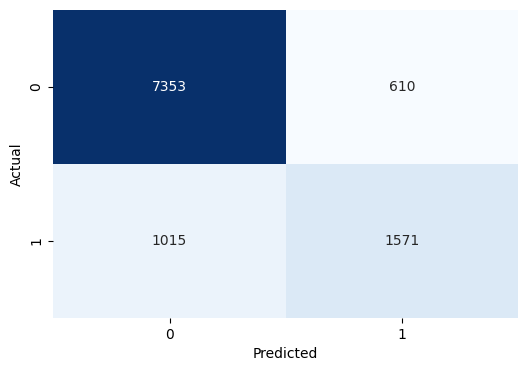

In [67]:
y_pred_logistic = logistic.predict(X_test_scaled)
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logistic):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_logistic):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_logistic):.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.8274
Precision: 0.6631
Recall: 0.6013
F1-Score: 0.6307


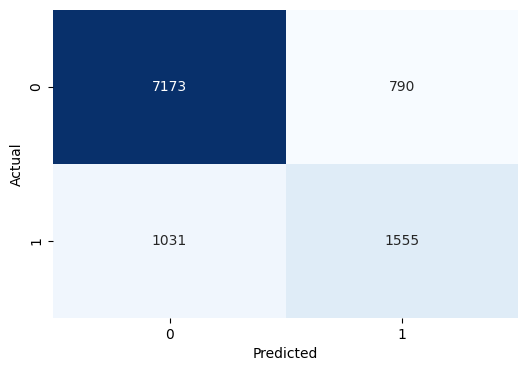

In [68]:
y_pred_knn = KNN.predict(X_test_scaled)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.8174
Precision: 0.6355
Recall: 0.5986
F1-Score: 0.6165


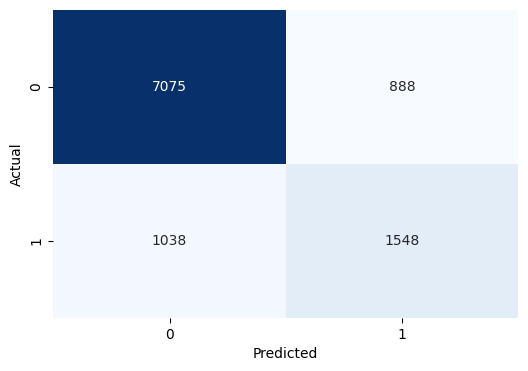

In [69]:
y_pred_dt = DT.predict(X_test_scaled)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.8454
Precision: 0.7317
Recall: 0.5831
F1-Score: 0.6490


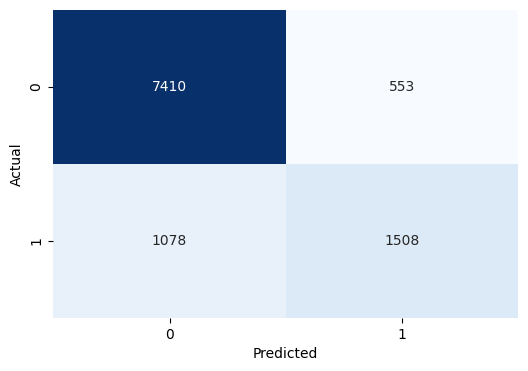

In [70]:
y_pred_svc = SVM.predict(X_test_scaled)
cm_svc = confusion_matrix(y_test, y_pred_svc)

print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svc):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svc):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svc):.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Bootstrap Aggregating Model

In [71]:
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [72]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(RF.feature_importances_,3)})

importances.sort_values('importance')

,feature,importance
20,occupation_Priv-house-serv,0.000
13,occupation_Armed-Forces,0.000
6,marital.status_Married-AF-spouse,0.001
8,marital.status_Married-spouse-absent,0.001
17,occupation_Handlers-cleaners,0.003
10,marital.status_Separated,0.003
11,marital.status_Widowed,0.003
25,occupation_Transport-moving,0.004
22,occupation_Protective-serv,0.004
18,occupation_Machine-op-inspct,0.004


Accuracy: 0.8357
Precision: 0.6825
Recall: 0.6168
F1-Score: 0.6480


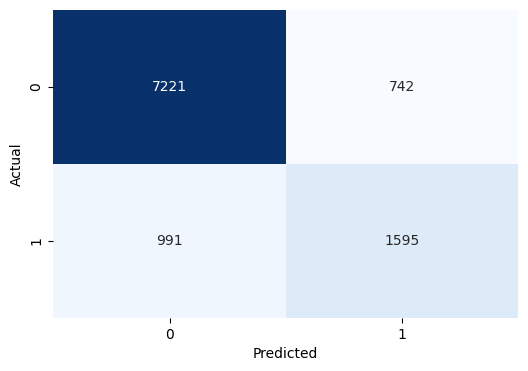

In [73]:
y_pred_rf = RF.predict(X_test_scaled)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Boosting Model

In [87]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

base_model = DecisionTreeClassifier()
adaBoost = AdaBoostClassifier(base_model, algorithm='SAMME')
gb = GradientBoostingClassifier(n_estimators=100, max_depth = 5, learning_rate = 0.1)

adaBoost.fit(X_train_scaled, y_train)
gb.fit(X_train, y_train)

print('Model training finished')

C:\Users\frend\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Model training finished


Accuracy: 0.8206
Precision: 0.6339
Recall: 0.6353
F1-Score: 0.6346


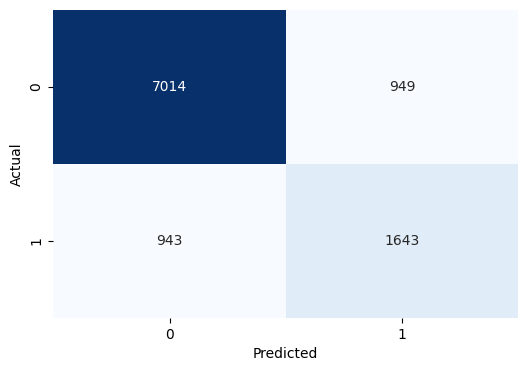

In [75]:
y_pred_adaBoost = adaBoost.predict(X_test_scaled)
cm_adaBoost = confusion_matrix(y_test, y_pred_adaBoost)

print(f"Accuracy: {accuracy_score(y_test, y_pred_adaBoost):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_adaBoost):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_adaBoost):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_adaBoost):.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm_adaBoost, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.8665
Precision: 0.7709
Recall: 0.6481
F1-Score: 0.7042


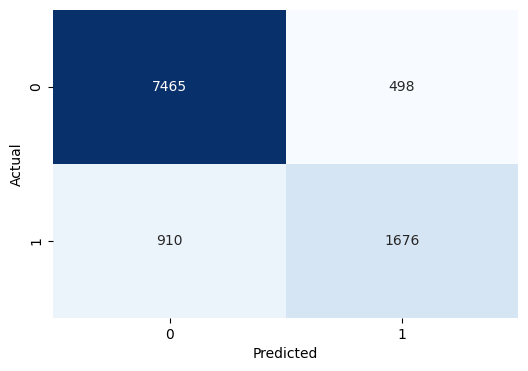

In [88]:
y_pred_gb = gb.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred_gb)

print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_gb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_gb):.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Parameter tuning for GradientBoostingClassifier

In [85]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

random_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_distributions=param_dist, cv=5, n_iter=27, scoring='accuracy', n_jobs=-1, verbose=2)
random_search.fit(X_train_scaled, y_train)

best_params = random_search.best_params_
best_gb = random_search.best_estimator_

print("Best Hyperparameters found by RandomizedSearchCV:")
print(best_params)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters found by RandomizedSearchCV:
{'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.2}


Accuracy: 0.8675
Precision: 0.7715
Recall: 0.6527
F1-Score: 0.7072


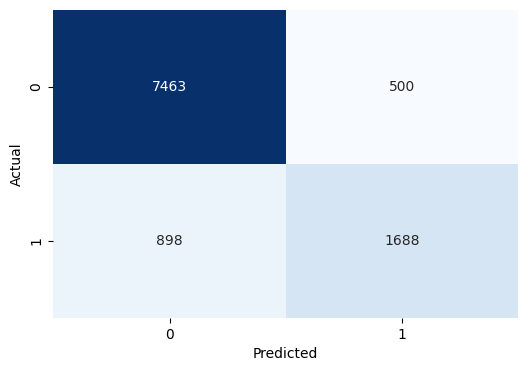

In [86]:
y_pred_tuned = best_gb.predict(X_test_scaled)
cm_gb = confusion_matrix(y_test, y_pred_tuned)

print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tuned):.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Result

The best performing model is Gradient Boosting Classifier with 87.18% Accuracy, 78.10% Precission, 66.32% recall, and 71.73% F1-Score

# Create Pipeline for Deployment

In [98]:
X = df_drop.drop('income', axis=1)
y = df_drop['income']

num_cols = X.select_dtypes('number').columns.tolist()
cat_cols = X.select_dtypes('object').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
        ("num", "passthrough", num_cols),
    ],
    remainder="drop"
)

gbc = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.2,
    max_depth=3,
    random_state=42
)

pipe = Pipeline([("pre", preprocessor), ("clf", gbc)])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipe.fit(X_train, y_train)

proba = pipe.predict_proba(X_test)[:, 1]
print("AUC:", roc_auc_score(y_test, proba))

joblib.dump(pipe, "income_gbc.pkl")
print("Saved income_gbc.pkl")

AUC: 0.9282952812402363
Saved income_gbc.pkl


In [100]:
df_drop

,age,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,income
1,82,9,Widowed,Exec-managerial,0,4356,18,0
3,54,4,Divorced,Machine-op-inspct,0,3900,40,0
4,41,10,Separated,Prof-specialty,0,3900,40,0
5,34,9,Divorced,Other-service,0,3770,45,0
6,38,6,Separated,Adm-clerical,0,3770,40,0
...,...,...,...,...,...,...,...,...
32556,22,10,Never-married,Protective-serv,0,0,40,0
32557,27,12,Married-civ-spouse,Tech-support,0,0,38,0
32558,40,9,Married-civ-spouse,Machine-op-inspct,0,0,40,1
32559,58,9,Widowed,Adm-clerical,0,0,40,0
